# Question 1

The chunck below in the notebook we downloaded was not working because windows does not have bash on it. There are different solution to this problem:
First we can use cmd instead of bash but obviously the code will be sligthly different. The second solution is to integrate the git bash with the python I could do that either. Also you install Cygwin which is a linux for windows. I end up install ubuntu from the windows store and change windows subsystems for Linux:
using the following code in powershell window:
### Enable-WindowsOptionalFeature -Online -FeatureName Microsoft-Windows-Subsystem-Linux
The link below shows the how to  do it:
https://docs.microsoft.com/en-us/windows/wsl/install-win10
and now the code get executed

In [24]:
%%bash
pwd

/mnt/c/Users/maber


In [25]:
%%bash
cd /mnt/c/Users/maber/Music
echo "using bash from inside Jupyter!" > test-file.txt
ls
echo ""
cat test-file.txt
rm test-file.txt

desktop.ini
test-file.txt
test.txt

using bash from inside Jupyter!


Next error was because I didnt have sql installed so I had to install it from the jupyter notebook terminal. i used the following code to do it:
pip install ipython-sql

In [ ]:
# Source: https://github.com/catherinedevlin/ipython-sql
# do pip install ipython-sql in the terminal
%load_ext sql

In [ ]:
%%sql sqlite://

SELECT *
FROM (
    SELECT 'Hello' as msg_1
) A JOIN (
    SELECT 'World!' as msg_2
) B;

Next error was because I didnt have version_information installed. Therefore, I installed it using the following code:
% pip install version_information

In [18]:
# pip install version_information
# https://github.com/jrjohansson/version_information
#
# alternate option: https://github.com/rasbt/watermark

%load_ext version_information
%version_information requests, numpy, pandas, matplotlib, seaborn, sklearn

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.7.0 64bit [MSC v.1912 64 bit (AMD64)]
IPython 6.5.0
OS Windows 10 10.0.17763 SP0
requests 2.19.1
numpy 1.15.1
pandas 0.23.4
matplotlib 2.2.3
seaborn 0.9.0
sklearn 0.19.2
Thu May 16 15:48:58 2019 AUS Eastern Standard Time

# Question 2

I wrote the data in excel and imported it as a .csv file using pandas

In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv("Example1.csv",header=0) 

In [7]:
data.head()

,Attribute,B,C,D,E,F,G,H
0,Output,80,150,135,165,95,130,110
1,Labour,60,100,100,120,70,90,80
2,Capital,50,100,80,100,60,80,70


In [8]:
datamelt=data.melt(id_vars="Attribute",var_name='country')
datamelt.head()

,Attribute,country,value
0,Output,B,80
1,Labour,B,60
2,Capital,B,50
3,Output,C,150
4,Labour,C,100


In [9]:
data2=datamelt.pivot(index='country',columns='Attribute',values='value')
data2.columns.name = None

In [10]:
data2.head()

,Capital,Labour,Output
country,,,
B,50,60,80
C,100,100,150
D,80,100,135
E,100,120,165
F,60,70,95


In [110]:
type(data2)

pandas.core.frame.DataFrame

## a.

mean and median and variance and standard deviation of the data has been given below:

In [55]:
data.melt(id_vars="Attribute").groupby(by="Attribute").agg(['mean', 'median','var','std'])

value                              
                 mean median         var        std
Attribute                                          
Capital     77.142857     80  357.142857  18.898224
Labour      88.571429     90  414.285714  20.354010
Output     123.571429    130  914.285714  30.237158

## b.

The histogram of the desired variables has been given below:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AC829E0CC0>,
      dtype=object)

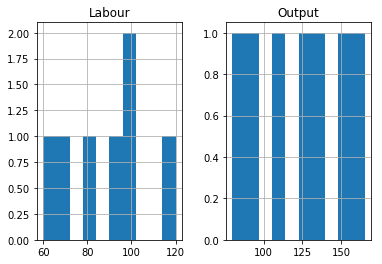

In [99]:
data2.hist(['Labour','Output'])

## c.
The log tranformation of the dat has been given below. In addition, I has reshaped the datda so that each variable would be in a column: 

In [109]:
data2.apply(np.log)

,Capital,Labour,Output
country,,,
B,3.912023,4.094345,4.382027
C,4.605170,4.605170,5.010635
D,4.382027,4.605170,4.905275
E,4.605170,4.787492,5.105945
F,4.094345,4.248495,4.553877
G,4.382027,4.499810,4.867534
H,4.248495,4.382027,4.700480


## d.
a multiple regression has been fitted to the data:

$\alpha=0.7687$ and $\beta=0.7944$ which means $\alpha + \beta \geq 1$. Therefore returns to scale are increasing.

In [111]:
import numpy as np
import statsmodels.formula.api as sm

In [134]:
result = sm.ols(formula="Output ~ Labour + Capital", data=data2).fit()
print(result.params)
print(result.summary())

Intercept   -5.794393
Labour       0.768692
Capital      0.794393
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 Output   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 15 May 2019   Prob (F-statistic):           5.39e-06
Time:                        19:23:07   Log-Likelihood:                -12.027
No. Observations:                   7   AIC:                             30.05
Df Residuals:                       4   BIC:                             29.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

The histogram for residuals is given below:

$\alpha=0.7687$ and $\beta=0.7944$ which means $\alpha + \beta \geq 1$. Therefore returns to scale are increasing.

## e.
The histogram of the residuals has been given below:

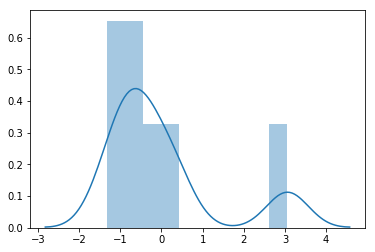

In [135]:
import seaborn as sns
sns.distplot(result.resid,bins=10)

## f.
The figure below shows the adjusted rsqured:

In [138]:
result.rsquared_adj

0.9965181439836449